In [12]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/FERNANDO LOPEZ/Documents/base_datos_2008.csv") 

In [13]:
df = df.dropna(subset = ["ArrDelay"]) #Eliminar los datos faltantes de la variable respuesta
df = df.sample(frac=1).head(100000) #Seleccionamos un subset de 10000 línea
Y = df["ArrDelay"]  #Vamos a intentar predecir la variable respuesta -> retraso en la llegada
X = df[["DepDelay"]]  #a traves del retraso en la salida

In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
regr = linear_model.LinearRegression()  #Ajustar el modelo
regr.fit(X, Y)  #Se ajusta con X y Y

print("Coeficientes: ", regr.coef_)  #Imprime los coeficientes
Y_pred = regr.predict(X)  #Encontramo el valor que genera el modelo, osea nuestras predicciones
print("R cuadrado: ", r2_score(Y, Y_pred)) #El coeficiente de determinación (R cuadrado) es la proporción de la varianza total de la variable explicada por la regresión
# Cuando el modelo es más próximo a 1 tenemos un modelo mejor y prox. a 0 menos explicativo

Coeficientes:  [1.01591252]
R cuadrado:  0.8717244143488458


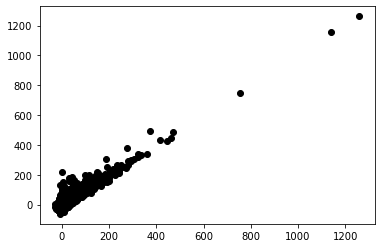

In [28]:
plt.scatter(X[1:10000], Y[1:10000], color = "black")
#plt.pyplot(X[1:10000],Y_pred[1:10000], color = "blue")
plt.show()

In [34]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['Month','DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X,fill_value=0)

In [35]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=646)

In [36]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.1728747316099053


In [37]:
X = X.add(df[["DepDelay"]], fill_value=0)

In [38]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

R cuadrado:  0.9724645635816583
